(sec_dicotomia)=
# Método de dicotomía

## Algoritmo

Consideramos una función $f:[a,b]\rightarrow\mathbb{R}$, continua en $[a,b]$, con $f(a)\,f(b)<0$.

Es decir, estamos considerando una función que cumple las hipótesis del Teorema de Bolzano, por lo que ya sabemos que existe una raíz para $f$ en el intervalo $[a,b]$. 
Una vez que sabemos que existe raíz el siguiente paso sería calcularla. Esto no siempre es sencillo (casi nunca, de hecho), y en algunos casos es directamente imposible.
Entonces surge una segunda opción: aproximar esa raíz mediante un **método numérico**. 

Llegados a este punto, hay distintos métodos numéricos que nos permiten aproximar la raíz de una función. Vamos a explicar ahora el más sencillo de ellos: el **método de dicotomía**, también conocido como **método de bisección**. En el siguiente capítulo explicaremos el método de Newton-Raphson, más eficiente numéricamente.

Para aproximar una raíz de $f$ en $[a,b]$, mediante dicotomía, la idea es muy sencilla: vamos dividiendo el intervalo a la mitad y nos quedamos con la mitad en la que se cumplan las hipótesis de Bolzano. 
Es decir:

* Dividimos el intervalo dado a la mitad.
* Tomamos el punto medio del intervalo, $c$, como aproximación de la raíz.
* Comprobamos cuál de los 2 subintervalos que nos quedan ($[a,c]$ o $[c,b]$) cumple la hipótesis de Bolzano.
* Repetimos el proceso.

Si lo escribimos de forma más cercana a cómo lo programaremos, llegamos al **algoritmo de dicotomía**: 

* Inicializar $\, [a_1,b_1]=[a,b]$.
* Para $\,k=1,2,\ldots, N_{\text{max}}$:
  * Calcular $\,x_k=\displaystyle\frac{a_k+b_k}{2}$.
  * Si $\, f(a_k)\,f(x_k)<0$, actualizar $[a_{k+1},b_{k+1}]=[a_k,x_k]$.
  * Si no, $[a_{k+1},b_{k+1}]=[x_k,b_k]$.
  * Realizamos un test de parada. Si se cumple, detenemos el algoritmo.
* Continuamos iterando.

En cuanto al test de parada, lo más habitual es realizarlo en función de la diferencia relativa entre 2 iteraciones consecutivas. Sería algo así, para un parámetro de tolerancia, $tol$, generalmente indicado por el usuario:

$$
\text{Si} \qquad \frac{\left| x_{k}-x_{k-1} \right|}{\left| x_{k} \right|} < tol \quad \Longrightarrow \quad \text{STOP}.
$$

````{prf:theorem} Estimación del error 
:label: th_dicotomia_estimacion
:nonumber: 

Sea $f:[a,b]\rightarrow\mathbb{R}$ una función continua en $[a,b]$ tal que $f(a)\,f(b)<0$. Sea $\alpha\in(a,b)$ tal que $f(\alpha)=0$.
Entonces, al aplicar el método de dicotomía en el intervalo $[a,b]$, el error máximo cometido en el paso $k$ está acotado mediante la siguiente fórmula: 

$$ |x_k - \alpha | \leq \frac{b-a}{2^k}.  $$ 
````

Nosotros seguimos, mostrándoos cómo programar este algoritmo en **Numpy**. 

De momento, lo escribiremos de forma directa, tal como lo hemos hecho en el algoritmo. Más adelante veremos cómo aislar parte o todo el algoritmo en una `function`, lo que nos permitirá realizar una programación estructurada.

In [1]:
import numpy as np
import sympy as sp

x = sp.symbols('x', real=True) # define la variable simbólica x
f_expr = sp.cos(x)
f = sp.Lambda(x,f_expr)

N_max = 100
tol = 1.e-5
a = 0.
b = 2.

x_aprox = np.zeros(N_max)

for k in range(0,N_max):
    x_aprox[k] = (a+b) / 2

    if f(x_aprox[k]) == 0: break
      
    if f(a) * f(x_aprox[k]) < 0:
        b = x_aprox[k]
    else:
       a = x_aprox[k]

if ( (k > 0) and (np.abs(x_aprox[k]-x_aprox[k-1]) / np.abs(x_aprox[k]) < tol) ): break

print('Número de iteraciones realizadas: ', k+1) # Contamos 1 más porque empezamos el bucle en 0
print('Aproximación de la raíz: ', x_aprox[k])
    

Número de iteraciones realizadas:  17
Aproximación de la raíz:  1.5707855224609375


Vamos a representar gráficamente los primeros pasos del algoritmo en este caso:

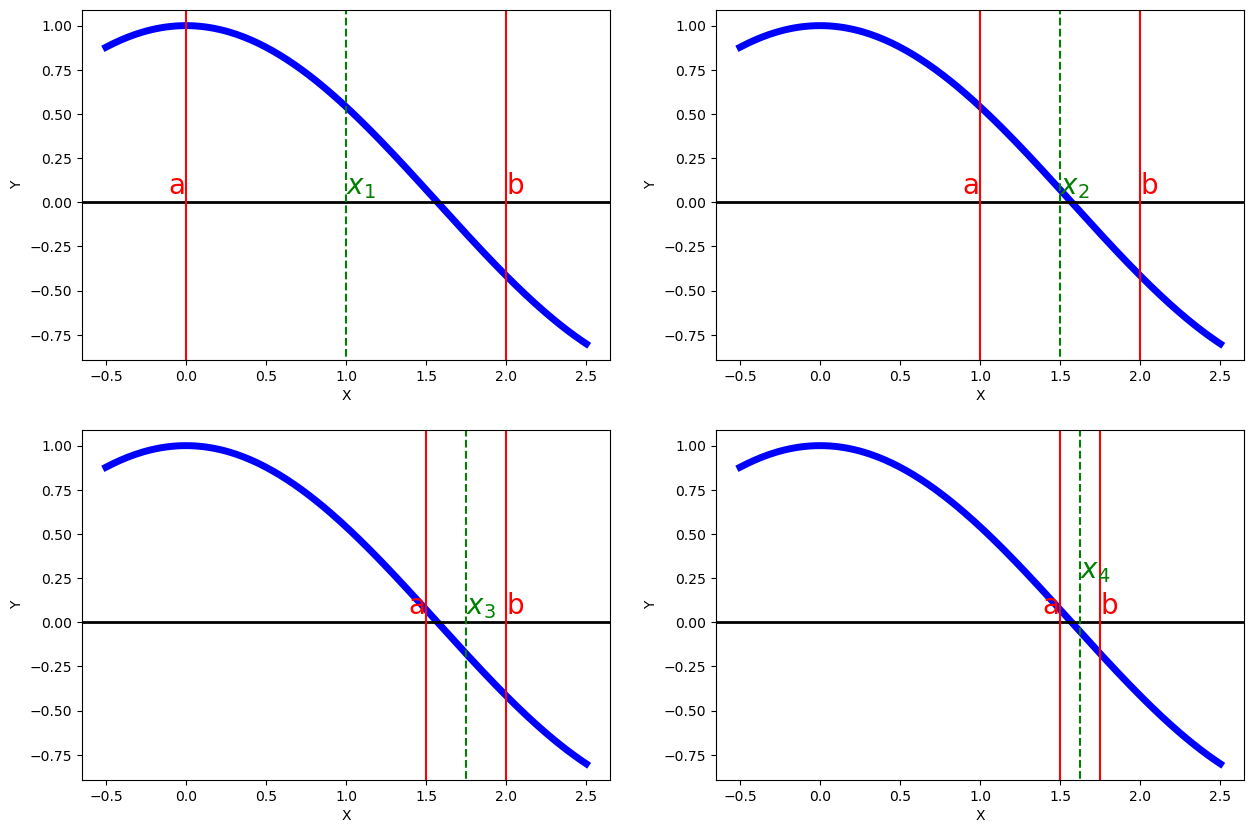

In [2]:
import matplotlib as mp
import matplotlib.pyplot as plt
mp.__version__

%matplotlib inline

# Creamos gráficos de funciones
x1 = np.linspace(-0.5, 2.5, 200)
y1 = np.cos(x1)

fig, axs = plt.subplots(2, 2, figsize=(15,10))

ax1 = axs[0,0]
ax1.plot(x1, y1, c='b', lw='5')
ax1.set_ylabel('Y', fontsize=10)
ax1.set_xlabel('X', fontsize=10)
ax1.axhline(y=0., c='black', lw='2')

ax1.axvline(x=0., ymin=-1, ymax=1, c='r')
ax1.text(-0.11, 0.05, 'a', c='r', fontsize=20)
ax1.axvline(x=2., ymin=-1, ymax=1, c='r')
ax1.text(2, 0.05, 'b', c='r', fontsize=20)
ax1.axvline(x=1., ymin=-1, ymax=1, c='g', ls='--')
ax1.text(1, 0.05, '$x_1$', c='g', fontsize=20)

ax2 = axs[0,1]
ax2.plot(x1, y1, c='b', lw='5')
ax2.set_ylabel('Y', fontsize=10)
ax2.set_xlabel('X', fontsize=10)
ax2.axhline(y=0., c='black', lw='2')

ax2.axvline(x=1., ymin=-1, ymax=1, c='r')
ax2.text(0.89, 0.05, 'a', c='r', fontsize=20)
ax2.axvline(x=2., ymin=-1, ymax=1, c='r')
ax2.text(2, 0.05, 'b', c='r', fontsize=20)
ax2.axvline(x=1.5, ymin=-1, ymax=1, c='g', ls='--')
ax2.text(1.5, 0.05, '$x_2$', c='g', fontsize=20)

ax3 = axs[1,0]
ax3.plot(x1, y1, c='b', lw='5')
ax3.set_ylabel('Y', fontsize=10)
ax3.set_xlabel('X', fontsize=10)
ax3.axhline(y=0., c='black', lw='2')

ax3.axvline(x=1.5, ymin=-1, ymax=1, c='r')
ax3.text(1.39, 0.05, 'a', c='r', fontsize=20)
ax3.axvline(x=2., ymin=-1, ymax=1, c='r')
ax3.text(2, 0.05, 'b', c='r', fontsize=20)
ax3.axvline(x=1.75, ymin=-1, ymax=1, c='g', ls='--')
ax3.text(1.75, 0.05, '$x_3$', c='g', fontsize=20)

ax4 = axs[1,1]
ax4.plot(x1, y1, c='b', lw='5')
ax4.set_ylabel('Y', fontsize=10)
ax4.set_xlabel('X', fontsize=10)
ax4.axhline(y=0., c='black', lw='2')

ax4.axvline(x=1.5, ymin=-1, ymax=1, c='r')
ax4.text(1.39, 0.05, 'a', c='r', fontsize=20)
ax4.axvline(x=1.75, ymin=-1, ymax=1, c='r')
ax4.text(1.75, 0.05, 'b', c='r', fontsize=20)
ax4.axvline(x=1.625, ymin=-1, ymax=1, c='g', ls='--')
ax4.text(1.625, 0.25, '$x_4$', c='g', fontsize=20)

plt.show()

## Links para ampliar

En el caso de que no nos hayáis entendido, o queráis ampliar vuestro conocimiento consultando, por ejemplo, la demostración de este último teorema, podéis mirar los siguientes links (la versión española de la Wikipedia, en este caso, está bastante bien, pero creemos que el algoritmo está mejor escrito en la versión inglesa, por eso incluimos ambas):

* https://pythonnumericalmethods.berkeley.edu/notebooks/chapter19.03-Bisection-Method.html
* https://es.wikipedia.org/wiki/M%C3%A9todo_de_bisecci%C3%B3n
* https://en.wikipedia.org/wiki/Bisection_method

## Ejercicio para que hagáis

Utiliza el método de dicotomía para aproximar la raíz de la función $f(x) = \ln\left(\tan(x)\right)$ en el intervalo $[0.1,1]$.

In [3]:
# ESCRIBE AQUÍ TU CÓDIGO

## Ejercicios para practicar un poco más

Para practicar un poco sobre lo que se explica en este tema os recomendamos los siguientes ejercicios del 
maravilloso blog https://existelimite.blogspot.com/, aunque es posible que en ellos encuentres algunas cosas (sobre la unicidad de raíces con el Teorema de Rolle, sobre todo), que aún no os hayamos contado:

* https://existelimite.blogspot.com/2014/10/un-ejercicio-del-metodo-de-dicotomia.html
* https://existelimite.blogspot.com/2017/10/un-problema-de-dicotomia-del-examen-de.html
* https://existelimite.blogspot.com/2018/01/otro-problema-sobre-el-metodo-de.html